In [2]:
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import pickle
import scipy.stats
import itertools

In [3]:
#from bci_plot.metadata import robot_sessions

In [4]:
from bci_plot.gen_data.robot import process_logs

In [6]:
part_logs = process_logs.process_logs('/data/raspy/robot/exp_2024-06-06_12-11-27/robot_logs/exp_2024-06-06_12-13-46.log')

In [8]:
part_logs.keys()

dict_keys(['timestamp', 'qdot', 'action', 'z_state', 'finished_reset', 'gripper', 'gripper_retval', 'gripper_state_at_ret', 'start_press', 'hover_state', 'xyz', 'trial_start_idx', 'trial_end_idx', 'trial_end_condition', 'all_objs', 'all_ids', 'all_objs_list', 'all_objs_idx', 'all_objs_ids', 'all_objs_len'])

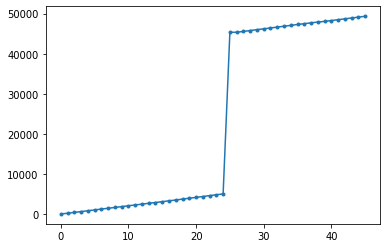

In [11]:
plt.plot(part_logs['all_objs_idx'], '.-')

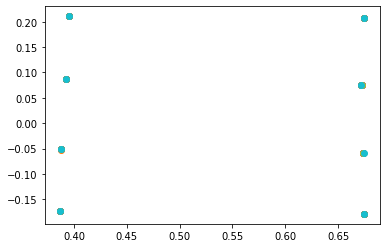

In [15]:
for i in range(10):
    _ = plt.scatter(*part_logs['all_objs_list'][i].T)

In [20]:
pts = part_logs['all_objs_list'][0]
print(sorted(pts[pts[:, 0] < 0.5].tolist(), key=lambda x: x[1]))
print(sorted(pts[pts[:, 0] >= 0.5].tolist(), key=lambda x: x[1]))

[[0.38682934641838074, -0.1740393340587616], [0.3877773582935333, -0.051953934133052826], [0.39206624031066895, 0.08739042282104492], [0.3952048718929291, 0.21041695773601532]]
[[0.6748749017715454, -0.17874546349048615], [0.6739190816879272, -0.05823232978582382], [0.6722318530082703, 0.0752374678850174], [0.6744784712791443, 0.207249715924263]]


In [22]:
np.linalg.norm(np.diff(np.array(sorted(pts[pts[:, 0] < 0.5].tolist(), key=lambda x: x[1])), axis=0), axis=-1)

array([0.12208908, 0.13941035, 0.12306656])

In [23]:
np.linalg.norm(np.diff(np.array(sorted(pts[pts[:, 0] >= 0.5].tolist(), key=lambda x: x[1])), axis=0), axis=-1)

array([0.12051692, 0.13348046, 0.13203136])

In [25]:
np.linalg.norm(np.array(sorted(pts[pts[:, 0] < 0.5].tolist(), key=lambda x: x[1])) - np.array(sorted(pts[pts[:, 0] >= 0.5].tolist(), key=lambda x: x[1])), axis=-1)

array([0.288084  , 0.28621059, 0.28042907, 0.27929156])